# Tensorflow

### 간단한 연산


In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
tf.__version__

'2.4.1'

In [11]:
a = tf.constant(5, name = 'input_a')
b = tf.constant(3, name = 'input_b')

In [13]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [14]:
b

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [12]:
c = tf.multiply(a,b, name = 'mul_c')
d = tf.add(a,b, name = 'add_d')
e = tf.subtract(a,b, name = 'minus_e')

In [18]:
tf.print(c)
tf.print(d)
tf.print(e)

15
8
2


### 텐서 정의

In [19]:
# convert to tensor
lst = [[1,2,3], [3,5,6]]
ndary = np.array([1,4,6])

x = tf.convert_to_tensor(2)
x1 = tf.convert_to_tensor(lst)
x2 = tf.convert_to_tensor(ndary)

In [20]:
tf.print(x)
tf.print(x1)
tf.print(x2)

2
[[1 2 3]
 [3 5 6]]
[1 4 6]


## 난수 생성 및 텐서플로 자료형의 다양한 출력

#### 난수 생성은 가중치 초기화(Xavier, He initialization)과 직접적 연관이 있으므로, 신경망 구성을 저수준으로 하게 된다면 필수적으로 알아야 하는 기능

In [21]:
rand = tf.random.uniform([1], 0, 1)
# ([생성 개수], 최솟값, 최댓값)을 가지는 랜덤 균일분포

In [22]:
tf.print(rand)
print(rand)
rand

[0.463573694]
tf.Tensor([0.4635737], shape=(1,), dtype=float32)


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.4635737], dtype=float32)>

In [23]:
rand = tf.random.normal([1], 0, 1)
# ([생성 개수], 평균, 표준편차)를 가지는 정규분포

tf.print(rand)
print(rand)
rand

[0.760573387]
tf.Tensor([0.7605734], shape=(1,), dtype=float32)


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7605734], dtype=float32)>

### seaborn


In [24]:
output1 = tf.random.uniform([500000], 0, 1)
output2 = tf.random.normal([500000], 0, 1)

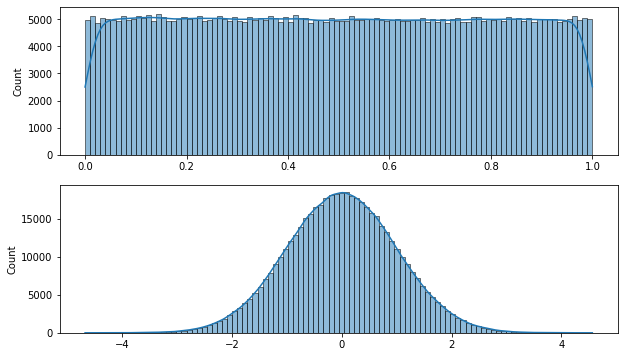

In [25]:
plt.figure(figsize = (10,6))
plt.subplot(211)
sns.histplot(output1, bins=100, kde=True)
plt.subplot(212)
sns.histplot(output2, bins=100, kde=True)
plt.show()

### matplotlib

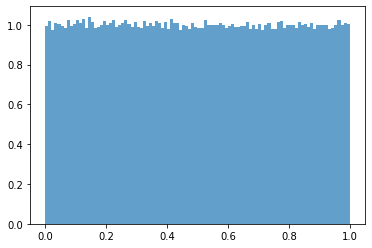

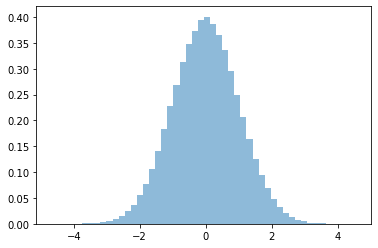

In [28]:
plt.hist(output1, bins=100, density=True, alpha=0.7, histtype='stepfilled')
plt.show()
plt.hist(output2, bins=50, density=True, alpha=0.5, histtype='stepfilled')
plt.show()

## 간단한 신경망 학습

In [34]:
import math
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(x):
    return np.maximum(x, 0)

In [30]:
input = np.linspace(-10,10,1000)

In [31]:
result = sigmoid(input)

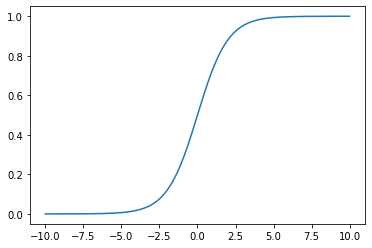

In [35]:
plt.plot(input, result)
plt.show()

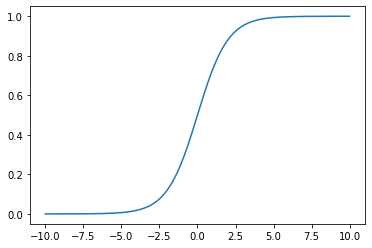

In [40]:
plt.plot(input, ReLU(result))
plt.show()

In [38]:
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x*w)
print(output)
output = ReLU(output)
print(output)

[0.39461994]
[0.39461994]


In [41]:
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
a = 0.1 #learning rate
for i in range(1000):
    output = sigmoid(x*w) #학습
    err = y - output
    w = w + a * err * x
    if i % 100 == 99:
        print(i, err, output)

99 [-0.13093595] [0.13093595]
199 [-0.05949195] [0.05949195]
299 [-0.03793772] [0.03793772]
399 [-0.02773849] [0.02773849]
499 [-0.02182587] [0.02182587]
599 [-0.01797626] [0.01797626]
699 [-0.01527386] [0.01527386]
799 [-0.01327385] [0.01327385]
899 [-0.01173469] [0.01173469]
999 [-0.01051394] [0.01051394]


In [44]:
tf.executing_eagerly() # TF ver.1과 다른 점

True

## 다차원 텐서곱

In [51]:
x = [[2.]]
x

[[2.0]]

In [52]:
m = tf.matmul(x, x)
print('hello, {}'.format(m))

hello, [[4.]]


In [54]:
a = tf.constant([[1,2],[3,4]])
print(a)
tf.print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
[[1 2]
 [3 4]]


In [56]:
m = tf.matmul(a, a)
print('hello, {}'.format(m))

hello, [[ 7 10]
 [15 22]]


In [58]:
# broadcasting 
b = tf.add(a,1)
tf.print(b)
print(b)

[[2 3]
 [4 5]]
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [59]:
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [60]:
# Tensor는 numpy로 읽어올 수 있다
c = np.multiply(a,b)
c

array([[ 2,  6],
       [12, 20]], dtype=int32)

In [61]:
a
a.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

# Gradient Tape (자동 미분) - 편미분

In [62]:
w = tf.Variable([1.0])
with tf.GradientTape() as tape:
    loss = w*w

grad = tape.gradient(loss, w) # 편미분
print(grad)

tf.Tensor([2.], shape=(1,), dtype=float32)


In [68]:
x = tf.constant(3.0)
y = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
    g.watch(x)
    g.watch(y)
    z0 = x**2
    z1 = y**2
    
dz_dy = g.gradient(z1, y)
print(dz_dy)

dz_dy = g.gradient(z1, y)
print(dz_dy)

del g

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [69]:
a

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [70]:
# 차원을 reduce하는 tf 연산
tf.print(tf.reduce_sum(a))
tf.print(tf.reduce_mean(a))

10
2


In [71]:
# tf.ones의 소개
x = tf.constant([[1,1],[1,1]], dtype=np.float64)
x

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 1.],
       [1., 1.]])>

In [72]:
x = tf.ones((2,2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [73]:
with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y,y)

In [77]:
z

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [78]:
dz_dx = t.gradient(z,x)
dz_dx
#non-persistent이기 때문에 2번 이상은 실행되지 않는다

RuntimeError: A non-persistent GradientTape can only be used tocompute one set of gradients (or jacobians)

In [96]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x*x
    z = y*x*z + 3
    w = x + 1999999
    
dy_dx = t.gradient(y,x)
dz_dx = t.gradient(z,x)
dw_dx = t.gradient(w,x)

del t 

In [97]:
print(dy_dx)
tf.print(dy_dx)
dy_dx.numpy()

tf.Tensor(6.0, shape=(), dtype=float32)
6


6.0

In [99]:
print(dz_dx)
tf.print(dz_dx)
dz_dx.numpy()

tf.Tensor(4551460500000.0, shape=(), dtype=float32)
4.55146052e+12


4551460500000.0

In [101]:
print(dw_dx)
tf.print(dw_dx)
dw_dx.numpy()

tf.Tensor(1.0, shape=(), dtype=float32)
1


1.0

In [102]:
x

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [103]:
# 고계도 미분
x = tf.constant(1.0)

with tf.GradientTape() as t1:
    t1.watch(x)
    with tf.GradientTape() as t2:
        t2.watch(x)
        y = x*x*x
    dy_dx = t2.gradient(y,x)
    
d2y_dx2 = t1.gradient(dy_dx, x)

In [104]:
dy_dx.numpy()

3.0

In [105]:
tf.print(d2y_dx2)

6


# tf.Data API

In [107]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [108]:
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


In [119]:
it = iter(dataset)

In [121]:
print(next(it).numpy())

3


In [122]:
dataset.reduce(3, lambda state, value: state + value).numpy()

25

In [123]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4,10]))

In [124]:
print(dataset1)
dataset1

<TensorSliceDataset shapes: (10,), types: tf.float32>


<TensorSliceDataset shapes: (10,), types: tf.float32>

In [125]:
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [133]:
dataset2 = tf.data.Dataset.from_tensor_slices((tf.random.uniform([4]),
                                              tf.random.uniform([4,100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [134]:
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [135]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

In [137]:
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [138]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices = [[0,0],[1,2]], values=[1,2], dense_shape=[3,4]))

In [139]:
for elem in dataset4:
    print(elem)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [140]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [141]:
np.set_printoptions(precision=3)

In [142]:
for z in dataset1:
    print(z.numpy())

[0.855 0.205 0.124 0.001 0.781 0.855 0.063 0.474 0.276 0.951]
[0.72  0.124 0.799 0.376 0.612 0.855 0.127 0.884 0.146 0.772]
[0.165 0.8   0.143 0.829 0.838 0.24  0.616 0.854 0.784 0.626]
[0.215 0.992 0.685 0.513 0.29  0.043 0.232 0.693 0.956 0.506]


In [143]:
list(dataset1.as_numpy_iterator())

[array([0.855, 0.205, 0.124, 0.001, 0.781, 0.855, 0.063, 0.474, 0.276,
        0.951], dtype=float32),
 array([0.72 , 0.124, 0.799, 0.376, 0.612, 0.855, 0.127, 0.884, 0.146,
        0.772], dtype=float32),
 array([0.165, 0.8  , 0.143, 0.829, 0.838, 0.24 , 0.616, 0.854, 0.784,
        0.626], dtype=float32),
 array([0.215, 0.992, 0.685, 0.513, 0.29 , 0.043, 0.232, 0.693, 0.956,
        0.506], dtype=float32)]

In [144]:
for i in range(4):
    print(list(dataset1.as_numpy_iterator())[i])

[0.855 0.205 0.124 0.001 0.781 0.855 0.063 0.474 0.276 0.951]
[0.72  0.124 0.799 0.376 0.612 0.855 0.127 0.884 0.146 0.772]
[0.165 0.8   0.143 0.829 0.838 0.24  0.616 0.854 0.784 0.626]
[0.215 0.992 0.685 0.513 0.29  0.043 0.232 0.693 0.956 0.506]


In [145]:
# 2d array
dataset = tf.data.Dataset.from_tensor_slices([[1,2],[3,4]])
list(dataset.as_numpy_iterator())

[array([1, 2], dtype=int32), array([3, 4], dtype=int32)]

In [146]:
dataset = tf.data.Dataset.from_tensor_slices([[1,2,3],[4,5,6],[7,8,9]])
list(dataset.as_numpy_iterator())

[array([1, 2, 3], dtype=int32),
 array([4, 5, 6], dtype=int32),
 array([7, 8, 9], dtype=int32)]

In [148]:
dataset = tf.data.Dataset.from_tensor_slices(([1,2,3],[1,2,4]))
list(dataset.as_numpy_iterator())

[(1, 1), (2, 2), (3, 4)]

In [149]:
dataset  = tf.data.Dataset.from_tensor_slices({'a':[1,2], 'b':[3,4]})
list(dataset.as_numpy_iterator())

[{'a': 1, 'b': 3}, {'a': 2, 'b': 4}]

## Feature와 Label을 붙여 보자

In [150]:
features = tf.constant([[1,3],[2,1],[3,3]])
labels = tf.constant(['A', 'B', 'A'])

# from_tensor_slices 를 활용해 붙이기
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

In [151]:
features_dataset = tf.data.Dataset.from_tensor_slices(features)
labels_dataset = tf.data.Dataset.from_tensor_slices(labels)

# 이미 data로 감싸져 있다면 zip으로 붙여준다
dataset = tf.data.Dataset.zip((features_dataset, labels_dataset))

In [161]:
batched_features = tf.data.Dataset.from_tensor_slices([[[1,2],[3,4]],[[5,6],[7,8]],[[9,10],[11,12]]])

In [162]:
batched_labels = tf.data.Dataset.from_tensor_slices([['A','B'],['A','A'],['B','A']])

In [163]:
list(batched_features.as_numpy_iterator())

[array([[1, 2],
        [3, 4]], dtype=int32), array([[5, 6],
        [7, 8]], dtype=int32), array([[ 9, 10],
        [11, 12]], dtype=int32)]

In [164]:
list(batched_labels.as_numpy_iterator())

[array([b'A', b'B'], dtype=object),
 array([b'A', b'A'], dtype=object),
 array([b'B', b'A'], dtype=object)]

In [165]:
batched_data = tf.data.Dataset.zip((batched_features, batched_labels))

In [167]:
for elem in batched_data.as_numpy_iterator():
    print(elem)
    
# 배치별로 데이터셋이 구성됨

(array([[1, 2],
       [3, 4]], dtype=int32), array([b'A', b'B'], dtype=object))
(array([[5, 6],
       [7, 8]], dtype=int32), array([b'A', b'A'], dtype=object))
(array([[ 9, 10],
       [11, 12]], dtype=int32), array([b'B', b'A'], dtype=object))


# AND 네트워크 구현


In [170]:
import numpy as np
import tensorflow as tf

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
learning_rate = 0.1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        err = y[j][0] - output
        w = w + err * learning_rate * x[j]
        b = b + b_x * learning_rate * err
        error_sum += err
        
    if i % 200 == 199:
        print(i, error_sum)

199 [-0.115]
399 [-0.067]
599 [-0.048]
799 [-0.037]
999 [-0.03]
1199 [-0.025]
1399 [-0.022]
1599 [-0.019]
1799 [-0.017]
1999 [-0.015]


In [171]:
for i in range(4):
    print('X : ', x[i], ' Y : ', y[i], 'Output = ', sigmoid(np.sum(x[i]*w)+b_x*b))

X :  [1 1]  Y :  [1] Output =  [0.965]
X :  [1 0]  Y :  [0] Output =  [0.025]
X :  [0 1]  Y :  [0] Output =  [0.025]
X :  [0 0]  Y :  [0] Output =  [2.441e-05]


In [172]:
tf.print(w)
tf.print(b)

[6.96093082 6.96408606]
[-10.6205368]


# XOR 네트워크 구현

In [173]:
import numpy as np
import tensorflow as tf

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
learning_rate = 0.1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j] * w) + b_x * b)
        err = y[j][0] - output
        w = w + err * learning_rate * x[j]
        b = b + b_x * learning_rate * err
        error_sum += err
        
    if i % 200 == 199:
        print(i, error_sum)

199 [-0.001]
399 [-2.962e-05]
599 [-1.192e-06]
799 [0.]
999 [0.]
1199 [0.]
1399 [0.]
1599 [0.]
1799 [0.]
1999 [0.]


In [174]:
for i in range(4):
    print('X : ', x[i], ' Y : ', y[i], 'Output = ', sigmoid(np.sum(x[i]*w)+b_x*b))

X :  [1 1]  Y :  [0] Output =  [0.513]
X :  [1 0]  Y :  [1] Output =  [0.513]
X :  [0 1]  Y :  [1] Output =  [0.5]
X :  [0 0]  Y :  [0] Output =  [0.5]


In [175]:
tf.print(w)
tf.print(b)

[0.0512816347 -1.3038516e-07]
[9.68575478e-08]


### 왜 단층 신경망은 XOR 네트워크를 학습할 수 없을까?

# 3.1 MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
(mnist_images, mnist_labels),_ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices((tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
                                             tf.cast(mnist_labells, tf.int64))).shuffle(1000).batch(32)

In [ ]:
mnist_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, [3,3], activation='relu', input_shape=(None, None, 1)),
    tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.complie(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam')

In [ ]:
mnist_model.summary()

In [ ]:
mnist_model.fit(mnist_images, mnist_labels)

# MNIST 숫자 데이터셋을 다양하게 학습시키기

## Conv net - Keras를 이용한 학습 맛보기

In [179]:
(mnist_images, mnist_labels),_ = tf.keras.datasets.mnist.load_data()

mnist_images = tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32) # cast는 astype이랑 같다고 보면 됨
mnist_labels = tf.cast(mnist_labels, tf.int64)

11493376/11490434 [==============================] - 1s 0us/step


In [180]:
mnist_labels

<tf.Tensor: shape=(60000,), dtype=int64, numpy=array([5, 0, 4, ..., 5, 6, 8])>

In [181]:
train_images = mnist_images[:50000, :,:, :]
train_labels = mnist_labels[:50000]

test_images = mnist_images[55000 :, :,:,:]
test_labels = mnist_labels[55000 :]

valid_images = mnist_images[50000:55000 :, :,:,:]
valid_labels = mnist_labels[50000:55000]

In [183]:
mnist_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, [3,3], activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, [3,3], activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, [3,3], activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # classification을 위한 softmax
])

In [184]:
mnist_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])


In [185]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [186]:
history = mnist_model.fit(train_images, train_labels, epochs=20, validation_data=(valid_images, valid_labels))

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4458 - accuracy: 0.8588 - val_loss: 0.0776 - val_accuracy: 0.9740
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0694 - accuracy: 0.9787 - val_loss: 0.0594 - val_accuracy: 0.9824
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0555 - val_accuracy: 0.9834
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0526 - val_accuracy: 0.9848
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 7/20
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0759 -

In [187]:
prediction = mnist_model.predict(test_images)
prediction_argmax = np.argmax(prediction, axis=1)

In [188]:
# 벡터화 연산
acc_arr = (prediction_argmax == test_labels.numpy())
acc = np.sum(acc_arr)/5000*100
print('정확도: ', acc, '%')

정확도:  98.74000000000001 %


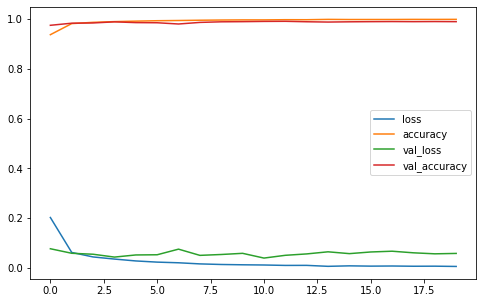

In [189]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# MLP - Multi Layer Perceptron > 기하학적 정보를 담지 못한다 (Conv net이랑 차이점)

In [190]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [200]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['accuracy'])

In [201]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [202]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(valid_images, valid_labels))

Epoch 1/20
1563/1563 [==============================] - 2s 990us/step - loss: 0.4705 - accuracy: 0.8663 - val_loss: 0.1750 - val_accuracy: 0.9496
Epoch 2/20
1563/1563 [==============================] - 1s 899us/step - loss: 0.1296 - accuracy: 0.9637 - val_loss: 0.1184 - val_accuracy: 0.9646
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0874 - accuracy: 0.9736 - val_loss: 0.1062 - val_accuracy: 0.9674
Epoch 4/20
1563/1563 [==============================] - 2s 988us/step - loss: 0.0618 - accuracy: 0.9819 - val_loss: 0.0927 - val_accuracy: 0.9698
Epoch 5/20
1563/1563 [==============================] - 1s 925us/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0972 - val_accuracy: 0.9676
Epoch 6/20
1563/1563 [==============================] - 1s 896us/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0832 - val_accuracy: 0.9742
Epoch 7/20
1563/1563 [==============================] - 1s 896us/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0787 - v

In [205]:
prediction = model.predict(test_images)
prediction_argmax = np.argmax(prediction, axis=1)

In [206]:
# 벡터화 연산
acc_arr = (prediction_argmax == test_labels.numpy())
acc = np.sum(acc_arr)/5000*100
print('정확도: ', acc, '%')

정확도:  97.94 %


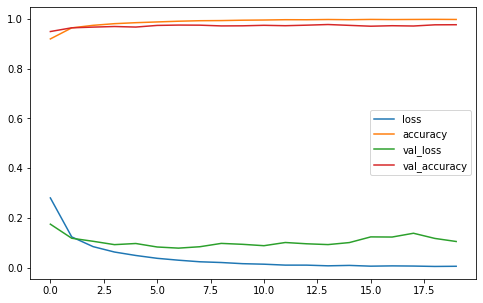

In [207]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# 뭐가 더 좋은 모델일까?

영상이나 이미지 처리에처리에 있어서 MLP는 문제점이 있다.
CNN은 처음 이미지를 input으로 받은 뒤 Convolution 과정과 Pooling과정을 반복하여 거친 후 MLP를 거치는 구조이다.

이때의 MLP를 모든 노드가 연결되어 있는 레이어라 해서 Fully-Connected layer라고도 부른다.

# 교재 HoM 3.1

In [213]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [214]:
X, y = mnist['data'], mnist['target']

In [215]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [216]:
type(y[0]) # int가 아닌 str임

str

In [218]:
y = y.astype(np.uint8) # 숫자로 바꿔주기

In [244]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진 분류기 - True or False

In [220]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [223]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

sgd_clf = make_pipeline(SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train_5)

Pipeline(steps=[('sgdclassifier', SGDClassifier(random_state=42))])

In [224]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95, 0.96, 0.96])

In [225]:
import sklearn.model_selection as sms
sms.cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95, 0.96, 0.96])

## 상속을 통한 새로운 클래스 정의, Never5Classifier

In [226]:
# Duck Typing?
class Duck:
    def sound(self):
        print("꽥꽥")

class Dog:
    def sound(self):
        print("멍멍")
    
def get_sound(animal):
    animal.sound()

def main():
    bird = Duck()
    dog = Dog()
    get_sound(bird)
    get_sound(dog)

In [227]:
main()

꽥꽥
멍멍


In [232]:
from sklearn.base import BaseEstimator, TransformerMixin
# TransformerMixin ? -> fit_transform을 자동상속해줌

class Never5Classifier(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): #y는 부모 클래스의 self 메서드에서 정의되므로 여기선 None
        return self # 부모 것을 그대로 상속받음
    def transform(self, X, y=None):
        return self
    def predict(self, X): # 전부 다 False 예측을 만들어낸다
        return np.zeros((len(X), 1), dtype=bool)

In [233]:
cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring='accuracy')

array([0.911, 0.909, 0.909])

# 오차 행렬 - 이진 분류기

In [234]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [235]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [236]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train_5, y_train_pred) # 정밀도
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)
print('정밀도: ', precision, '\n재현율: ', recall, '\nF1: ', f1)

정밀도:  0.8370879772350012 
재현율:  0.6511713705958311 
F1:  0.7325171197343846


### 의료 데이터에서는 정밀도가 중요할까 재현율이 중요할까?

실제 환자들이 병원에 갔을 때 ** 환자라고 진찰하는 비율이 높아야 하므로 재현율이 중요하지 않을까..? 

# 정밀도재현율 트레이드오프 - 이진 분류기

In [237]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [238]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

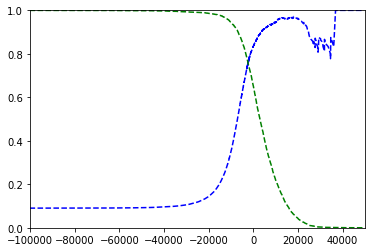

In [239]:
plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
plt.plot(thresholds, recalls[:-1], 'g--', label='재현율')
plt.ylim([0,1])
plt.xlim([-100000, 50000])
plt.show()

# 적절한 threshold를 찾자

In [240]:
thresholds.shape

(59966,)

# 다중 분류기 - 핵심

세상엔 yes/no 문제보다 다중 분류 문제가 훨씬 많다. 다중 분류 시작

In [241]:
from sklearn.svm import SVC # Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
# 데이터 전처리 및 결과해석이 중요!

SVC()

In [245]:
def disp(prediction, ans):
    if prediction == ans:
        print('Correct!')
    else:
        print('Wrong')
        
for i in range(10):    
    disp(svm_clf.predict([X_test[i]]), y_test[i])

KeyError: 0

In [246]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

KeyboardInterrupt: 

OneVsRest나 OneVsOne은 컴퓨터비전에서 딱히,,

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.965, 0.963, 0.965])

# 데이터 전처리의 중요성 - Standard Scaler

In [250]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train.astype(np.float64))

In [251]:
# sgd classifier
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.898, 0.891, 0.902])

In [ ]:
# random forest classifier 
cross_val_score(rf_clf, X_train_scaled, y_train, cv=3, scoring='accuracy') # 딱히 효과 없음 (선형모델이 아니기 때문에)

# 에러 분석

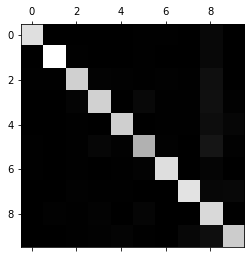

In [252]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [255]:
# 각 열별로 정규화 시키기
rs = conf_mx.sum(axis=1, keepdims=True)
rs

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [256]:
norm_conf_mx = conf_mx / rs

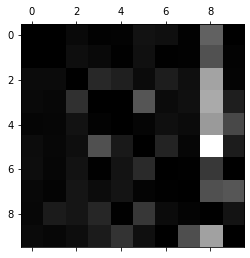

In [257]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()